### 1. Importación de Librerías

In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### 2. Inicialización de Datos

- DataFrame de Viajes

In [55]:
# data
rides = pd.read_csv("data/PFDA_rides.csv")

- DataFrame de Clima

In [54]:
weather = pd.read_csv("data/PFDA_weather.csv")

### 3. Exploración Inicial de los Datos

#### DATOS DE LOS VIAJES

In [7]:
rides.head()

distance cab_type    time_stamp    destination            source  price  \
0      0.44     Lyft  1.544950e+12  North Station  Haymarket Square    5.0   
1      0.44     Lyft  1.544950e+12  North Station  Haymarket Square   11.0   
2      0.44     Lyft  1.544950e+12  North Station  Haymarket Square    7.0   
3      0.44     Lyft  1.544950e+12  North Station  Haymarket Square   26.0   
4      0.44     Lyft  1.544950e+12  North Station  Haymarket Square    9.0   

   surge_multiplier                                    id    product_id  \
0                 1  424553bb-7174-41ea-aeb4-fe06d4f4b9d7     lyft_line   
1                 1  4bd23055-6827-41c6-b23b-3c491f24e74d  lyft_premier   
2                 1  981a3613-77af-4620-a42a-0c0866077d1e          lyft   
3                 1  c2d88af2-d278-4bfd-a8d0-29ca77cc5512   lyft_luxsuv   
4                 1  e0126e1f-8ca9-4f2e-82b3-50505a09db9a     lyft_plus   

           name  
0        Shared  
1           Lux  
2          Lyft  
3  Lux Black XL  
4       Lyft XL

- Existen diferentes tipos de viajes.
- El precio varía por cada tipo de viaje.


In [8]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   distance          693071 non-null  float64
 1   cab_type          693071 non-null  object 
 2   time_stamp        693071 non-null  float64
 3   destination       693071 non-null  object 
 4   source            693071 non-null  object 
 5   price             637976 non-null  float64
 6   surge_multiplier  693071 non-null  int64  
 7   id                693071 non-null  object 
 8   product_id        693071 non-null  object 
 9   name              693071 non-null  object 
dtypes: float64(3), int64(1), object(6)
memory usage: 52.9+ MB


- Hay 693071 registros en total.
- Tenemos 10 columnas, contando con tipos de valores enteros, flotantes y objeto.

In [9]:
rides.describe()

distance    time_stamp          price  surge_multiplier
count  693071.000000  6.930710e+05  637976.000000     693071.000000
mean        2.189430  1.544046e+12      16.545125          1.014287
std         1.138937  6.892342e+08       9.324359          0.118818
min         0.020000  1.543200e+12       2.500000          1.000000
25%         1.280000  1.543440e+12       9.000000          1.000000
50%         2.160000  1.543740e+12      13.500000          1.000000
75%         2.920000  1.544830e+12      22.500000          1.000000
max         7.860000  1.545160e+12      97.500000          3.000000

- Hallamos estadísticos relevantes para analizar.
- Todo parece uniforme excepto la variable 'precio', que tiene la media un poco por encima de la mediana, indicando un sesgo positivo.

#### 3.1  Exploración de Tipos de Viajes

In [10]:
rides["name"].nunique()

13

In [11]:
rides.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

- Tenemos 13 tipos de viajes disponibles. 

#### 3.2  Exploración de Lugares de Partida

In [12]:
rides.source.nunique()

12

In [13]:
rides.source.unique()

array(['Haymarket Square', 'Back Bay', 'North End', 'North Station',
       'Beacon Hill', 'Boston University', 'Fenway', 'South Station',
       'Theatre District', 'West End', 'Financial District',
       'Northeastern University'], dtype=object)

- Tenemos 12 puntos de partida.

####  3.3 Exploración de Lugares de Destino

In [14]:
rides.destination.nunique()

12

In [15]:
rides.destination.unique()

array(['North Station', 'Northeastern University', 'West End',
       'Haymarket Square', 'South Station', 'Fenway', 'Theatre District',
       'Beacon Hill', 'Back Bay', 'North End', 'Financial District',
       'Boston University'], dtype=object)

- Tenemos 12 puntos de destino.

#### 3.4  Exploración de Empresas con las que Trabajamos

In [16]:
rides["cab_type"].nunique()

2

In [17]:
rides["cab_type"].unique()

array(['Lyft', 'Uber'], dtype=object)

- Tenemos 2 empresas de viajes en automóvil.

#### DATOS DE LAS CONDICIONES CLIMÁTICAS

In [18]:
weather.head()

temp            location  clouds  pressure    rain  time_stamp  humidity  \
0  42.42            Back Bay     1.0   1012.14  0.1228  1545003901      0.77   
1  42.43         Beacon Hill     1.0   1012.15  0.1846  1545003901      0.76   
2  42.50   Boston University     1.0   1012.15  0.1089  1545003901      0.76   
3  42.11              Fenway     1.0   1012.13  0.0969  1545003901      0.77   
4  43.13  Financial District     1.0   1012.14  0.1786  1545003901      0.75   

    wind  
0  11.25  
1  11.32  
2  11.07  
3  11.09  
4  11.49

In [19]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   temp        6276 non-null   float64
 1   location    6276 non-null   object 
 2   clouds      6276 non-null   float64
 3   pressure    6276 non-null   float64
 4   rain        894 non-null    float64
 5   time_stamp  6276 non-null   int64  
 6   humidity    6276 non-null   float64
 7   wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


- Tenemos 6276 registros en total.
- Hay 8 columnas con el tipo de dato flotante en su mayoría. Tenemos también tipos enteros y objeto.

In [20]:
weather.describe()

temp       clouds     pressure        rain    time_stamp  \
count  6276.000000  6276.000000  6276.000000  894.000000  6.276000e+03   
mean     39.090475     0.677777  1008.445209    0.057652  1.543857e+09   
std       6.022055     0.314284    12.870775    0.100758  6.659340e+05   
min      19.620000     0.000000   988.250000    0.000200  1.543204e+09   
25%      36.077500     0.440000   997.747500    0.004900  1.543387e+09   
50%      40.130000     0.780000  1007.660000    0.014850  1.543514e+09   
75%      42.832500     0.970000  1018.480000    0.060925  1.544691e+09   
max      55.410000     1.000000  1035.120000    0.780700  1.545159e+09   

          humidity         wind  
count  6276.000000  6276.000000  
mean      0.763985     6.802812  
std       0.127340     3.633466  
min       0.450000     0.290000  
25%       0.670000     3.517500  
50%       0.760000     6.570000  
75%       0.890000     9.920000  
max       0.990000    18.180000

- Hallamos estadísticos principales para análisis.
- En general casi todos los valores se ven uniformes, excepto 'clouds' y 'rain', que tienen variaciones entre su media y mediana. En el caso de 'clouds' es más significativo y tiene sesgo negativo, mientras que en 'rain' es un pequeño sesgo positivo.

#### 3.5  Exploración de Lugares con Registros Climáticos

In [21]:
weather.location.nunique()

12

In [22]:
weather.location.unique()

array(['Back Bay', 'Beacon Hill', 'Boston University', 'Fenway',
       'Financial District', 'Haymarket Square', 'North End',
       'North Station', 'Northeastern University', 'South Station',
       'Theatre District', 'West End'], dtype=object)

- Tenemos 12 lugares con registros climáticos.

#### 3.6  Análisis de Media en Todas las Variables

In [51]:
weather.groupby("location").mean(numeric_only=True)

temp    clouds     pressure      rain  \
location                                                              
Back Bay                 39.082122  0.678432  1008.447820  0.020073   
Beacon Hill              39.047285  0.677801  1008.448356  0.020135   
Boston University        39.047744  0.679235  1008.459254  0.020701   
Fenway                   38.964379  0.679866  1008.453289  0.021202   
Financial District       39.410822  0.676730  1008.435793  0.022330   
Haymarket Square         39.067897  0.676711  1008.445239  0.021309   
North End                39.090841  0.676730  1008.441912  0.020583   
North Station            39.035315  0.676998  1008.442811  0.019406   
Northeastern University  38.975086  0.678317  1008.444168  0.019716   
South Station            39.394092  0.677495  1008.438031  0.023195   
Theatre District         38.986711  0.677763  1008.444742  0.021053   
West End                 38.983403  0.677247  1008.441090  0.020852   

                           time_stamp  humidity      wind  
location                                                   
Back Bay                 1.543857e+09  0.764073  6.778528  
Beacon Hill              1.543857e+09  0.765048  6.810325  
Boston University        1.543857e+09  0.763786  6.692180  
Fenway                   1.543857e+09  0.767266  6.711721  
Financial District       1.543857e+09  0.754837  6.860019  
Haymarket Square         1.543857e+09  0.764837  6.843193  
North End                1.543857e+09  0.764054  6.853117  
North Station            1.543857e+09  0.765545  6.835755  
Northeastern University  1.543857e+09  0.767648  6.749426  
South Station            1.543857e+09  0.755468  6.848948  
Theatre District         1.543857e+09  0.767992  6.834302  
West End                 1.543857e+09  0.767266  6.816233

- Los lugares tienden a tener condiciones climáticas casi similares en promedio.

### 4. Evaluación de Calidad de Datos

#### DATOS DE LOS VIAJES

####  4.1 Duplicados

In [26]:
rides.duplicated().sum()

np.int64(0)

- No existen valores duplicados para los datos de los viajes.

#### 4.2 Nulos

In [28]:
rides.isnull().sum()

distance                0
cab_type                0
time_stamp              0
destination             0
source                  0
price               55095
surge_multiplier        0
id                      0
product_id              0
name                    0
dtype: int64

- Tenemos 55095 valores nulos en la columna de 'precio'.

In [56]:
porcentaje_nulos = (rides["price"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en price: {porcentaje_nulos}%")

Porcentaje de valores nulos en price: 7.95%


- El porcentaje de nulos con respecto al total de datos es de 7.95%.

#### 4.3  Imputación de Datos

In [52]:
rides["price"] = rides.groupby("cab_type")["price"].transform(lambda x: x.fillna(x.median()))

- Imputamos los datos de precio nulos con la mediana de cada empresa.

In [31]:
rides.isnull().sum()

distance            0
cab_type            0
time_stamp          0
destination         0
source              0
price               0
surge_multiplier    0
id                  0
product_id          0
name                0
dtype: int64

- Ya no tenemos valores nulos.
- Se imputaron correctamente los datos!

#### 4.4 Outliers

In [77]:
num_cols = ["distance", "time_stamp", "price", "surge_multiplier"]

- Seleccionamos las columnas numéricas.

In [78]:
Q1 = rides[num_cols].quantile(0.25)
Q3 = rides[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [79]:
Q1

distance            1.280000e+00
time_stamp          1.543440e+12
price               9.000000e+00
surge_multiplier    1.000000e+00
Name: 0.25, dtype: float64

- Primer cuartil.

In [80]:
Q3

distance            2.920000e+00
time_stamp          1.544830e+12
price               2.250000e+01
surge_multiplier    1.000000e+00
Name: 0.75, dtype: float64

- Tercer cuartil.

In [81]:
IQR

distance            1.640000e+00
time_stamp          1.390000e+09
price               1.350000e+01
surge_multiplier    0.000000e+00
dtype: float64

- Rango intercuartílico.

In [82]:
lower_limit = Q1 - 1.5 * IQR # límite inferior
upper_limit = Q3 + 1.5 * IQR # límite superior


- Calculamos los límites superiores e inferiores de los bigotes.

In [83]:
lower_limit

distance           -1.180000e+00
time_stamp          1.541355e+12
price              -1.125000e+01
surge_multiplier    1.000000e+00
dtype: float64

- Límite inferior.

In [84]:
upper_limit

distance            5.380000e+00
time_stamp          1.546915e+12
price               4.275000e+01
surge_multiplier    1.000000e+00
dtype: float64

- Límite superior.

In [ ]:
num_outliers_dist = ((rides["distance"] < lower_limit["distance"]) | (rides["distance"] > upper_limit["distance"])).sum()
porcent_outliers_dist = (num_outliers_dist / len(rides) * 100).round(2)

num_outliers_time = ((rides["time_stamp"] < lower_limit["time_stamp"]) | (rides["time_stamp"] > upper_limit["time_stamp"])).sum()
porcent_outliers_time = (num_outliers_time / len(rides) * 100).round(2)

num_outliers_price = ((rides["price"] < lower_limit["price"]) | (rides["price"] > upper_limit["price"])).sum()
porcent_outliers_price = (num_outliers_price / len(rides) * 100).round(2)

num_outliers_surge = ((rides["surge_multiplier"] < lower_limit["surge_multiplier"]) | (rides["surge_multiplier"] > upper_limit["surge_multiplier"])).sum()
porcent_outliers_surge = (num_outliers_surge / len(rides) * 100).round(2)

print(f"El número de outliers en la columna 'distance' es: {num_outliers_dist}, correspondiendo al {porcent_outliers_dist}% del total de datos.")
print(f"El número de outliers en la columna 'time_stamp' es: {num_outliers_time}, correspondiendo al {porcent_outliers_time}% del total de datos.")
print(f"El número de outliers en la columna 'price' es: {num_outliers_price}, correspondiendo al {porcent_outliers_price}% del total de datos.")
print(f"El número de outliers en la columna 'surge_multiplier' es: {num_outliers_surge}, correspondiendo al {porcent_outliers_surge}% del total de datos.")

El número de outliers en la columna 'distance' es: 8662, correspondiendo al 1.25% del total de datos.
El número de outliers en la columna 'time_stamp' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'price' es: 5589, correspondiendo al 0.81% del total de datos.
El número de outliers en la columna 'surge_multiplier' es: 9890, correspondiendo al 1.43% del total de datos.


#### DATOS DE LAS CONDICIONES CLIMÁTICAS

#### 4.5  Duplicados

In [40]:
weather.duplicated().sum()

np.int64(0)

- No hay valores duplicados para los datos de las condiciones climáticas. 

#### 4.6 Nulos

In [41]:
weather.isnull().sum()

temp             0
location         0
clouds           0
pressure         0
rain          5382
time_stamp       0
humidity         0
wind             0
dtype: int64

- Tenemos 5382 valores nulos para la columna 'lluvia'.

In [57]:
porcentaje_nulos = (weather["rain"].isnull().mean() * 100).round(2)
print(f"Porcentaje de valores nulos en rain: {porcentaje_nulos}%")

Porcentaje de valores nulos en rain: 85.76%


- El porcentaje de nulos con respecto al total de datos es de 85.76%.
- Un valor muy alto, y analizando con detenimiento, si hablamos de lluvia puede que los valores nulos representen que no hubo lluvia en ese momento.

In [61]:
weather[weather["rain"] == 0]

Empty DataFrame
Columns: [temp, location, clouds, pressure, rain, time_stamp, humidity, wind]
Index: []

- Corroboramos que no haya valores de 0 en la columna 'lluvia', ya que de ser el caso, el nulo no necesariamente represente una cantidad nula de lluvia.
- Al no haber valores de 0, asumimos que la cantidad nula de lluvia es porque no hubo lluvia. Es decir, 'rain' = 0.

In [63]:
weather["rain"] = weather["rain"].fillna(0)

- Imputamos los datos nulos con el valor de 0.

#### 4.7  Outliers

In [43]:
num_cols = ["temp", "pressure", "rain", "humidity", "wind"]

- Seleccionamos las columnas numéricas.

In [44]:
Q1 = weather[num_cols].quantile(0.25)
Q3 = weather[num_cols].quantile(0.75)
IQR = Q3 - Q1

- Calculamos los cuartiles y el rango intercuartílico.

In [45]:
Q1

temp         36.0775
pressure    997.7475
rain          0.0140
humidity      0.6700
wind          3.5175
Name: 0.25, dtype: float64

- Primer cuartil.

In [46]:
Q3

temp          42.8325
pressure    1018.4800
rain           0.0160
humidity       0.8900
wind           9.9200
Name: 0.75, dtype: float64

- Tercer cuartil.

In [47]:
IQR

temp         6.7550
pressure    20.7325
rain         0.0020
humidity     0.2200
wind         6.4025
dtype: float64

- Rango intercuartílico.

In [48]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

- Calculamos los límites superiores e inferiores de los bigotes.

In [49]:
lower_limit

temp         25.94500
pressure    966.64875
rain          0.01100
humidity      0.34000
wind         -6.08625
dtype: float64

- Límite inferior.

In [50]:
upper_limit

temp          52.96500
pressure    1049.57875
rain           0.01900
humidity       1.22000
wind          19.52375
dtype: float64

- Límite superior.

In [ ]:
num_outliers_temp = ((weather["temp"] < lower_limit["temp"]) | (weather["temp"] > upper_limit["temp"])).sum()
porcent_outliers_temp = (num_outliers_temp / len(weather) * 100).round(2)

num_outliers_pres = ((weather["pressure"] < lower_limit["pressure"]) | (weather["pressure"] > upper_limit["pressure"])).sum()
porcent_outliers_pres = (num_outliers_pres / len(weather) * 100).round(2)

num_outliers_rain = ((weather["rain"] < lower_limit["rain"]) | (weather["rain"] > upper_limit["rain"])).sum()
porcent_outliers_rain = (num_outliers_rain / len(weather) * 100).round(2)

num_outliers_humid = ((weather["humidity"] < lower_limit["humidity"]) | (weather["humidity"] > upper_limit["humidity"])).sum()
porcent_outliers_humid = (num_outliers_humid / len(weather) * 100).round(2)

num_outliers_wind = ((weather["wind"] < lower_limit["wind"]) | (weather["wind"] > upper_limit["wind"])).sum()
porcent_outliers_wind = (num_outliers_wind / len(weather) * 100).round(2)

print(f"El número de outliers en la columna 'temp' es: {num_outliers_temp}, correspondiendo al {porcent_outliers_temp}% del total de datos.")
print(f"El número de outliers en la columna 'pressure' es: {num_outliers_pres}, correspondiendo al {porcent_outliers_pres}% del total de datos.")
print(f"El número de outliers en la columna 'rain' es: {num_outliers_rain}, correspondiendo al {porcent_outliers_rain}% del total de datos.")
print(f"El número de outliers en la columna 'humidity' es: {num_outliers_humid}, correspondiendo al {porcent_outliers_humid}% del total de datos.")
print(f"El número de outliers en la columna 'wind' es: {num_outliers_wind}, correspondiendo al {porcent_outliers_wind}% del total de datos.")

El número de outliers en la columna 'temp' es: 266, correspondiendo al 4.24% del total de datos.
El número de outliers en la columna 'pressure' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'rain' es: 800, correspondiendo al 12.75% del total de datos.
El número de outliers en la columna 'humidity' es: 0, correspondiendo al 0.0% del total de datos.
El número de outliers en la columna 'wind' es: 0, correspondiendo al 0.0% del total de datos.


#### ------------------ REFLEXIÓN ------------------

Para los datos de 'weather':
- Se observaron algunos valores fuera del rango esperado principalmente en las variables rain y temp.
- Estos representan condiciones climáticas inusuales más que errores, por lo que se conservaron para no perder información relevante del comportamiento real del clima.  

Para los datos de 'rides':
- Se identificaron valores atípicos en la variable price, distance y surge_multiplier. 
- Estos valores podrían corresponder a viajes de lujo, trayectos largos o errores de registro.

La presencia de estos outliers puede afectar las medidas de tendencia central, como la media, haciendo que los precios promedio parezcan más altos de lo real. Por ello, es importante analizarlos antes de realizar comparaciones o modelos estadísticos.

### 5.  Análisis de Distribución de Variables

<Axes: xlabel='price', ylabel='Count'>

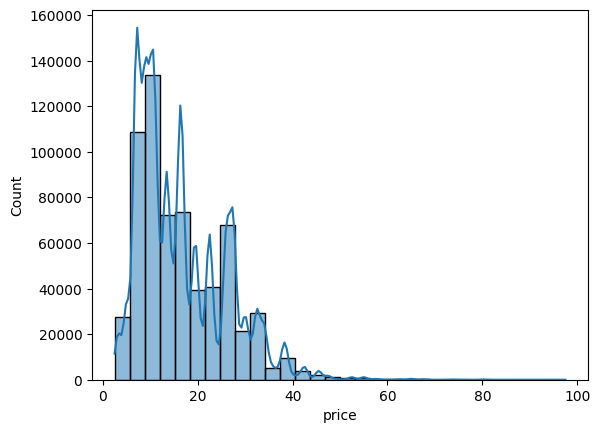

In [ ]:
sns.histplot(rides["price"], bins=30, kde=True)

El gráfico muestra que la mayoría de los precios de los viajes se concentran en el rango bajo, con una distribución sesgada hacia la derecha. Hay algunos valores atípicos con precios significativamente más altos, lo que indica que existen viajes más caros, pero son menos frecuentes.

<Axes: xlabel='cab_type', ylabel='price'>

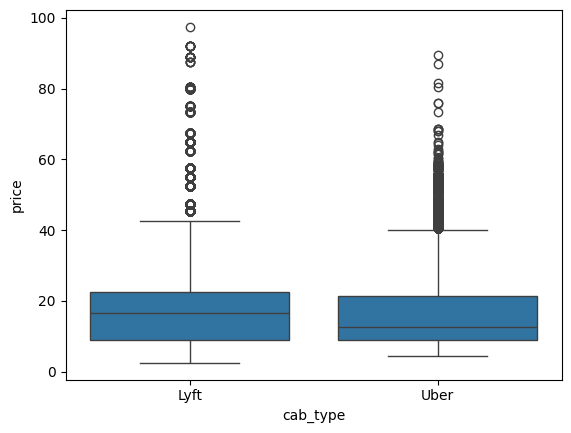

In [ ]:
sns.boxplot(x="cab_type", y="price", data=rides)

Se observa que la empresa Lyft tiene la distribución de precios ligeramente más amplia, lo que indica una mayor variabilidad en los precios de sus viajes en comparación con Uber. La mediana de Lyft está un poco más alta que la de Uber, lo que sugiere que, en promedio, los precios de los viajes en Lyft tienden a ser superiores a los de Uber. Además, ambos gráficos muestran la presencia de algunos valores atípicos (Con Lyft teniendo los más altos, por supuesto), pero no parecen ser excesivos ni afectar significativamente la distribución general de los precios en ambas empresas.

<Axes: xlabel='distance', ylabel='Count'>

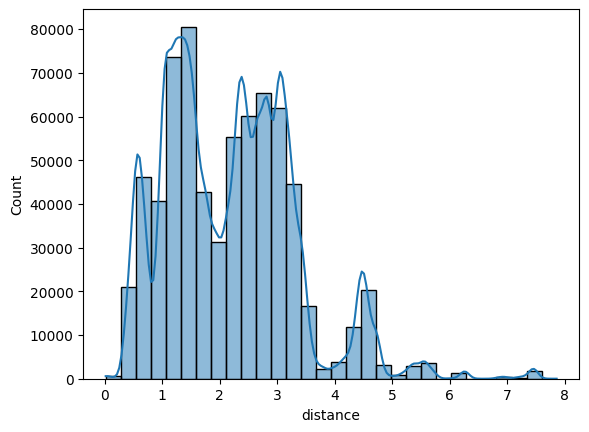

In [ ]:
sns.histplot(rides["distance"], bins=30, kde=True)

El gráfico muestra que la distancia de los viajes tiene una distribución sesgada hacia la derecha, con la mayoría de los viajes concentrados en distancias más cortas. Hay una disminución gradual en la frecuencia de los viajes a medida que la distancia aumenta, lo que indica que los viajes más largos son menos comunes.

In [ ]:
tabla = pd.crosstab(rides["source"], rides["destination"])

plt.figure(figsize=(15, 6))
sns.heatmap(tabla, annot=True, cmap="YlGnBu")

<Axes: xlabel='destination', ylabel='source'>

En el mapa de calor se observa que ciertas combinaciones de origen y destino tienen una mayor frecuencia de viajes, lo que indica rutas populares entre los usuarios. Todas tienen una frecuencia similar, por lo que aunque sean las usuales de los usuarios, no hay una favorita que se superponga muy por encima de las demás.